In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE


# wczytanie danych
X = pd.read_csv('ds/distance.csv')
y = X.pop('pose_type')
filepath = X.pop('filepath')


In [47]:
X.shape

(1846, 35)

In [48]:

# Standaryzacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Analiza głównych składowych
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
kernel_X = kernel_pca.fit_transform(X_scaled)

In [49]:
# Budowanie autoenkodera
input_layer = Input(shape=(X.shape[1],))
encoding_layer_1 = Dense(32, activation='relu')(input_layer)
encoding_layer_2 = Dense(8, activation='relu')(encoding_layer_1)
encoding_layer_3 = Dense(2, activation='relu')(encoding_layer_2)
decoding_layer_1 = Dense(8, activation='relu')(encoding_layer_3)
output_layer = Dense(1, activation='linear')(decoding_layer_1)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Trenowanie autoenkodera
autoencoder.fit(X_scaled, y, epochs=50, batch_size=64, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)])

# Budowanie encodera
encoder = Model(input_layer, encoding_layer_2)

# Enkodowanie danych
X_encoded = encoder.predict(X_scaled)

# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_encoded)

Epoch 1/50
29/29 [==============================] - 1s 6ms/step - loss: 0.2440 - accuracy: 0.6403
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0965 - accuracy: 0.8971
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 0.0720 - accuracy: 0.9290
Epoch 4/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0626 - accuracy: 0.9366
Epoch 5/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0553 - accuracy: 0.9485
Epoch 6/50
29/29 [==============================] - 0s 5ms/step - loss: 0.0492 - accuracy: 0.9588
Epoch 7/50
29/29 [==============================] - 0s 7ms/step - loss: 0.0435 - accuracy: 0.9642
Epoch 8/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0379 - accuracy: 0.9670
Epoch 9/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0330 - accuracy: 0.9735
Epoch 10/50
29/29 [==============================] - 0s 6ms/step - loss: 0.0288 - accuracy: 0.9783
Epoch 11/50
29/29 [

/home/wespazjan/miniconda3/envs/tf24/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/wespazjan/miniconda3/envs/tf24/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


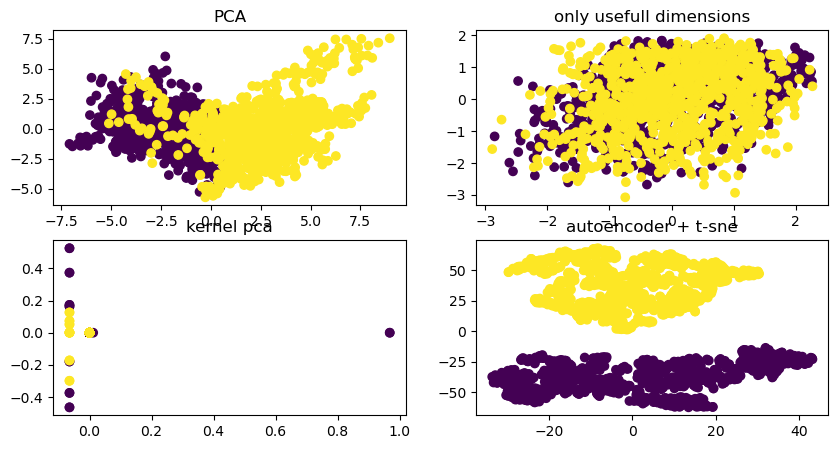

In [50]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 5))

# print data distribution
ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
ax1.set_title("PCA")
ax2.scatter(X_scaled[:, 2], X_scaled[:, 3], c=y)
ax2.set_title("only usefull dimensions")
ax3.scatter(kernel_X[:, 0], kernel_X[:, 1], c=y)
ax3.set_title("kernel pca")
ax4.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
ax4.set_title("autoencoder + t-sne")
fig.show()

In [51]:
kernel_X

array([[-4.56112708e-06, -8.78409424e-17],
       [-4.56112708e-06, -8.83889750e-17],
       [-4.56112714e-06, -8.76480828e-17],
       ...,
       [-4.56112708e-06, -8.79307838e-17],
       [-4.56112708e-06, -7.92293437e-17],
       [-4.56137617e-06, -8.09009928e-17]])